In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import warnings

warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")
%matplotlib inline

In [2]:
def frange(start, stop, step):
    i = start
    while i < stop:
        step += step/2
        yield i
        i += step

explode = tuple((i for i in frange(0, 20, 0.01)))

In [3]:
df=pd.read_csv("data/reports_anonymous_clean.csv", sep=";", encoding = 'utf8')

df['DATA_PRELIEVO'] = pd.to_datetime(df['DATA_PRELIEVO'])
df['DATA_ULTIMA_MESTRUAZIONE'] = pd.to_datetime(df['DATA_ULTIMA_MESTRUAZIONE'])
df['DATA_PAP_PRECEDENTE'] = pd.to_datetime(df['DATA_PAP_PRECEDENTE'])

# drop cols 'Unnamed 0'
df.drop(['Unnamed: 0'], axis=1, inplace=True)

df

,ETA_PRELIEVO,DATA_PRELIEVO,DATA_ULTIMA_MESTRUAZIONE,DATA_PAP_PRECEDENTE,FORNICE,PORTIO,CAN_CERV,CAV_UT,PERDITE_ER,LEUCORREA,...,CITO_PREC,VIRALE_PREC,BATT_PREC,CONTROLLO,CTRL_ISTOLOGICO,VALIDITA_CAMPIONE,CAUSA_CAMPIONE_NON_VALIDO,BATT,CITO,VIRALE
0,54,2018-04-01,NaT,NaT,False,True,True,False,False,False,...,NaN,NaN,NaN,NaN,NaN,ADEGUATO,NaN,NaN,AGC-NOS,NaN
1,49,2015-11-01,2015-10-01,NaT,False,True,True,False,False,False,...,NaN,NaN,NaN,NaN,NaN,ADEGUATO,NaN,CANDIDA,NEGATIVO,NaN
2,45,2015-07-01,2015-06-01,NaT,False,True,True,False,False,False,...,NaN,NaN,NaN,NaN,NaN,ADEGUATO,NaN,NaN,ASCUS,NaN
3,66,2016-04-01,NaT,2012-01-01,False,True,True,False,False,False,...,NEGATIVO,NaN,NaN,NaN,NaN,ADEGUATO,NaN,NaN,AGC-NOS,NaN
4,41,2016-03-01,2016-02-01,2013-01-01,False,True,True,False,False,False,...,NEGATIVO,NaN,NaN,12.0,NaN,ADEGUATO,NaN,DODERLEIN,NEGATIVO,NaN
5,24,2016-05-01,2016-04-01,NaT,False,True,True,False,False,False,...,NaN,NaN,NaN,12.0,NaN,ADEGUATO,NaN,COCCHI,NEGATIVO,NaN
6,29,2016-06-01,2016-05-01,NaT,False,True,True,False,False,True,...,NaN,NaN,NaN,12.0,NaN,ADEGUATO,NaN,COCCHI,NEGATIVO,NaN
7,27,2016-04-01,2016-03-01,NaT,False,True,True,False,False,False,...,NaN,NaN,NaN,12.0,NaN,ADEGUATO,NaN,COCCHI,NEGATIVO,NaN
8,55,2016-06-01,NaT,2016-01-01,False,True,True,False,False,False,...,NEGATIVO,HPV,NaN,12.0,NaN,NaN,NaN,COCCHI,NEGATIVO,NaN
9,47,2014-09-01,2014-07-01,NaT,False,True,True,False,False,False,...,NaN,NaN,NaN,12.0,NaN,ADEGUATO,NaN,COCCHI,NEGATIVO,NaN


In [4]:
print('number of columns: ',len(df.columns))
print(df.columns)

number of columns:  32
Index(['ETA_PRELIEVO', 'DATA_PRELIEVO', 'DATA_ULTIMA_MESTRUAZIONE',
       'DATA_PAP_PRECEDENTE', 'FORNICE', 'PORTIO', 'CAN_CERV', 'CAV_UT',
       'PERDITE_ER', 'LEUCORREA', 'PRURITO', 'TER_RAD', 'TER_ORM',
       'GRAVIDANZE', 'ABORTI', 'TEST_ESTR', 'TER_ANTIF', 'OP_GIN', 'MENOPAUSA',
       'AMENORREA', 'POST_PARTUM', 'PRIMO_PAP', 'CITO_PREC', 'VIRALE_PREC',
       'BATT_PREC', 'CONTROLLO', 'CTRL_ISTOLOGICO', 'VALIDITA_CAMPIONE',
       'CAUSA_CAMPIONE_NON_VALIDO', 'BATT', 'CITO', 'VIRALE'],
      dtype='object')


## Simple variable analysis

### ETA_PRELIEVO

In [5]:
df['ETA_PRELIEVO'].describe()

count    8804.000000
mean       42.579396
std        12.502984
min        12.000000
25%        33.000000
50%        42.000000
75%        51.000000
max        88.000000
Name: ETA_PRELIEVO, dtype: float64

In [6]:
ETA_PRELIEVO = df.groupby('ETA_PRELIEVO')['ETA_PRELIEVO'].count()
print(ETA_PRELIEVO)

ETA_PRELIEVO
12      1
13      2
14      1
16      4
17      4
18     13
19     32
20     59
21     83
22    121
23    111
24    134
25    142
26    145
27    170
28    161
29    203
30    221
31    219
32    226
33    237
34    235
35    265
36    269
37    258
38    250
39    235
40    250
41    229
42    261
     ... 
58    120
59     90
60     84
61     86
62     71
63     79
64     62
65     49
66     54
67     51
68     41
69     43
70     42
71     37
72     34
73     26
74     18
75      9
76     22
77     19
78      8
79      4
80      5
81      2
82      2
83      3
84      3
85      4
87      1
88      1
Name: ETA_PRELIEVO, Length: 75, dtype: int64


In [7]:
title_eta_prelievo = 'Numero di casi per età'

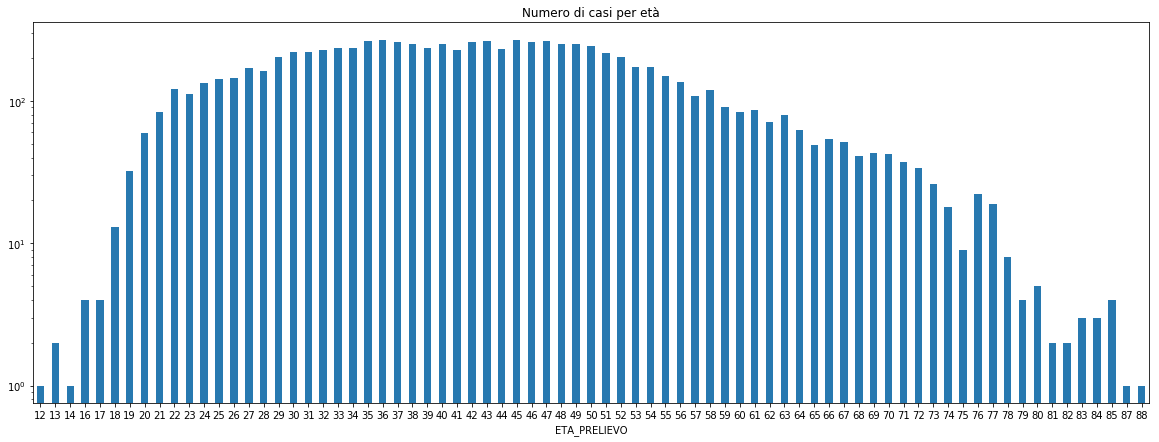

In [8]:
ETA_PRELIEVO.plot(kind='bar', title = title_eta_prelievo, figsize=(20,7),\
                  rot=0, legend=False, color='#2879b0', logy=True)
plt.savefig("plots/eta_prelievo_barplot")

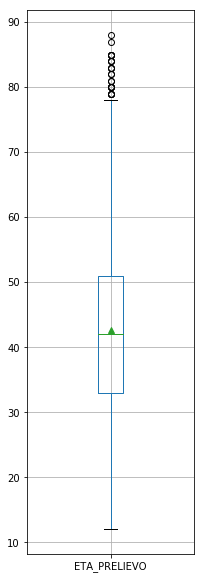

In [9]:
df.boxplot('ETA_PRELIEVO', figsize=(3,10), showmeans=True, rot=0)
plt.savefig("plots/eta_prelievo_boxplot")

### DATA_PRELIEVO

In [10]:
df['DATA_PRELIEVO'].describe()

count                    8802
unique                     69
top       2014-09-01 00:00:00
freq                      220
first     2007-11-01 00:00:00
last      2018-04-01 00:00:00
Name: DATA_PRELIEVO, dtype: object

In [11]:
DATA_PRELIEVO = df['DATA_PRELIEVO'].groupby([df["DATA_PRELIEVO"].dt.year.rename('ANNO')]).count()
DATA_PRELIEVO.index = DATA_PRELIEVO.index.astype('int64')
print(DATA_PRELIEVO)

ANNO
2007       3
2010       1
2012      13
2013    1428
2014    1972
2015    1801
2016    1702
2017    1415
2018     467
Name: DATA_PRELIEVO, dtype: int64


In [12]:
title_data_prelievo = 'Numero di casi per anno'

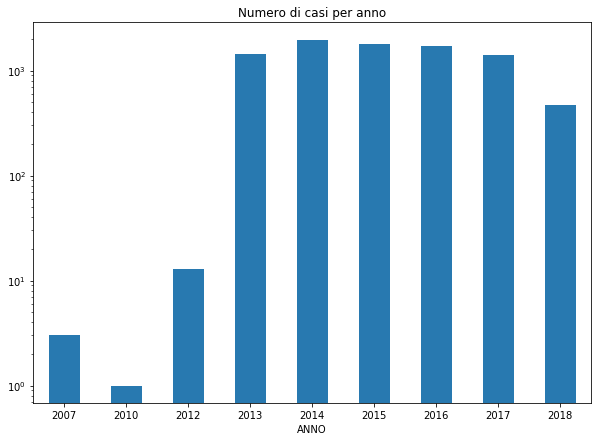

In [13]:
DATA_PRELIEVO.plot(kind='bar', title=title_data_prelievo,\
                   figsize=(10,7), rot=0, legend=False, color='#2879b0', logy=True)
plt.savefig("plots/data_prelievo_barplot")

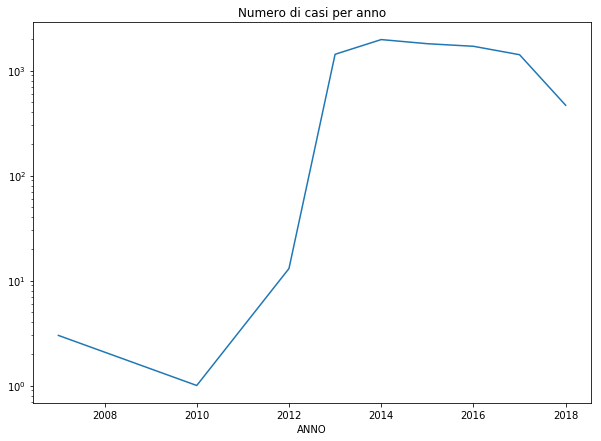

In [14]:
DATA_PRELIEVO.plot(kind='line', title= title_data_prelievo,\
                   figsize=(10,7), rot=0, logy=True)
plt.savefig("plots/data_prelievo_lineplot")

In [15]:
DATA_PRELIEVO_PIE = DATA_PRELIEVO.sort_values(ascending=False)[:6]
DATA_PRELIEVO_PIE

ANNO
2014    1972
2015    1801
2016    1702
2013    1428
2017    1415
2018     467
Name: DATA_PRELIEVO, dtype: int64

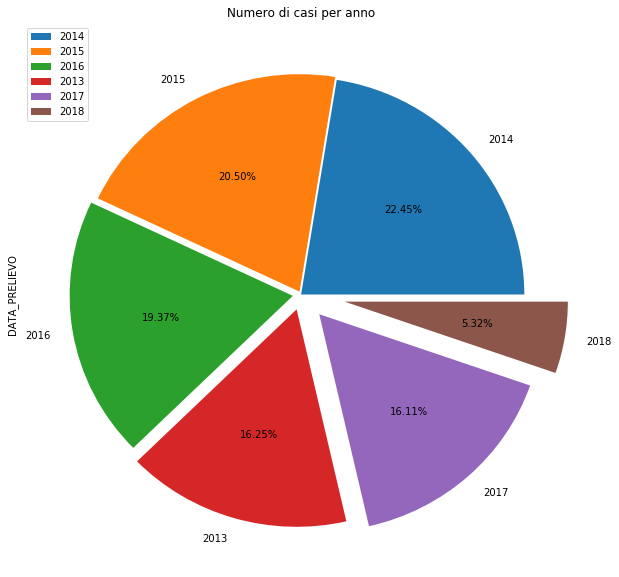

In [16]:
DATA_PRELIEVO_PIE.plot(kind='pie', figsize=(10,10), legend=True,\
                   explode = explode[:len(DATA_PRELIEVO_PIE)],\
                   title = title_data_prelievo,\
                   autopct='%1.2f%%', startangle=0)
plt.savefig("plots/data_prelievo_pieplot")

In [17]:
df['GRAVIDANZE'].describe()

count    8804.000000
mean        0.572808
std         0.920831
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         8.000000
Name: GRAVIDANZE, dtype: float64

In [18]:
DATA_PRELIEVO_YM = df['DATA_PRELIEVO']\
                        .groupby([df["DATA_PRELIEVO"].dt.year.rename('ANNO'), df["DATA_PRELIEVO"].dt.month.rename('MESE')])\
                        .count()

DATA_PRELIEVO_YM.index = pd.MultiIndex.from_tuples([(int(ix[0]), int(ix[1])) for ix in DATA_PRELIEVO_YM.index.tolist()])

print(DATA_PRELIEVO_YM)

2007  11      3
2010  4       1
2012  3       1
      11      2
      12     10
2013  1      30
      2      28
      3       3
      4     114
      5     189
      6     159
      7     146
      8      98
      9     152
      10    195
      11    156
      12    158
2014  1     136
      2     164
      3     196
      4     171
      5     180
      6     142
      7     155
      8     114
      9     220
      10    183
      11    166
      12    145
2015  1     144
           ... 
      11    143
      12    101
2016  1     138
      2     135
      3     155
      4     148
      5     217
      6     155
      7     108
      8      89
      9     177
      10    159
      11    140
      12     81
2017  1      71
      2     112
      3     139
      4      90
      5     128
      6      84
      7     128
      8     123
      9     133
      10    183
      11    142
      12     82
2018  1     156
      2     131
      3     163
      4      17
Name: DATA_PRELIEVO, Len

### GRAVIDANZE

In [106]:
df['GRAVIDANZE'].describe()

count    8804.000000
mean        0.572808
std         0.920831
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         8.000000
Name: GRAVIDANZE, dtype: float64

In [19]:
GRAVIDANZE = df.groupby('GRAVIDANZE')['GRAVIDANZE'].count()
GRAVIDANZE.index = GRAVIDANZE.index.astype('int64')
print(GRAVIDANZE)

GRAVIDANZE
0    5934
1    1076
2    1484
3     262
4      36
5       6
6       4
7       1
8       1
Name: GRAVIDANZE, dtype: int64


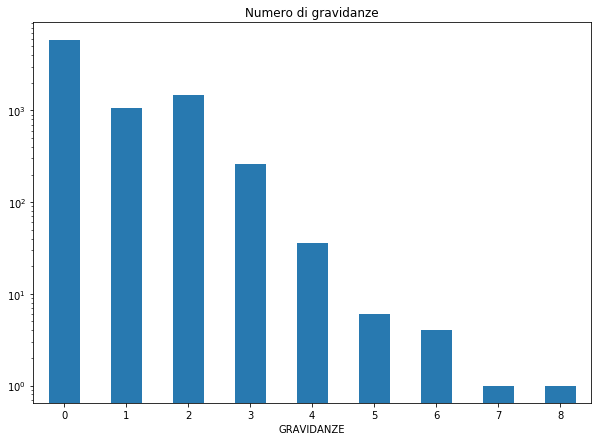

In [20]:
title_gravidanze = 'Numero di gravidanze'
GRAVIDANZE.plot(kind='bar', figsize=(10,7), title = title_gravidanze, rot=0,\
                color='#2879b0', legend=False, logy=True)
plt.savefig("plots/gravidanze_barplot")

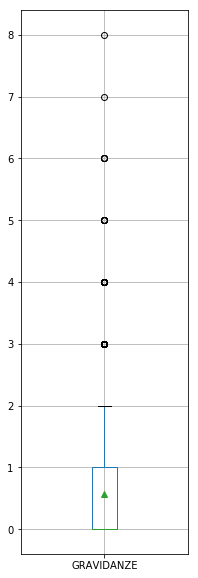

In [21]:
df.boxplot('GRAVIDANZE', figsize=(3,10), showmeans=True, rot=0)
plt.savefig("plots/gravidanze_boxplot")

In [22]:
GRAVIDANZE_PIE = GRAVIDANZE.sort_values(ascending=False)[:4]
GRAVIDANZE_PIE

GRAVIDANZE
0    5934
2    1484
1    1076
3     262
Name: GRAVIDANZE, dtype: int64

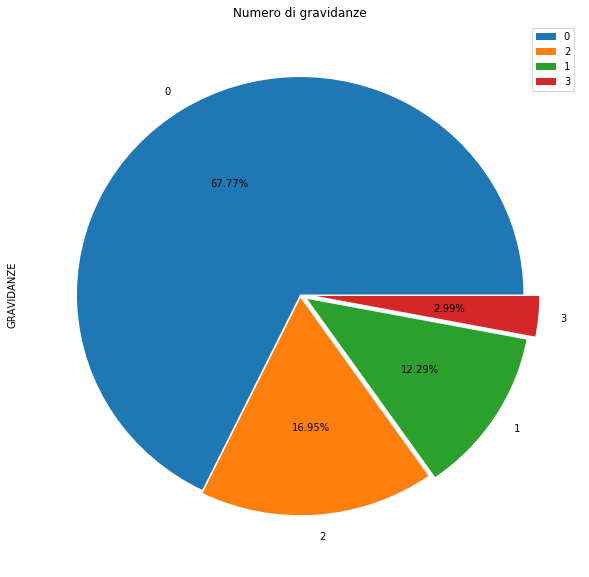

In [23]:
GRAVIDANZE_PIE.plot(kind='pie', figsize=(10,10), legend=True,\
                    explode = explode[:len(GRAVIDANZE_PIE)],\
                    title = title_gravidanze,\
                    autopct='%1.2f%%', startangle=0)
plt.savefig("plots/gravidanze_pieplot")

In [24]:
df['ABORTI'].describe()

count    8804.000000
mean        0.129259
std         0.473890
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         8.000000
Name: ABORTI, dtype: float64

In [25]:
ABORTI = df.groupby('ABORTI')['ABORTI'].count()
ABORTI.index = ABORTI.index.astype('int64')
print(ABORTI)

ABORTI
0    7991
1     595
2     151
3      42
4      13
5      11
8       1
Name: ABORTI, dtype: int64


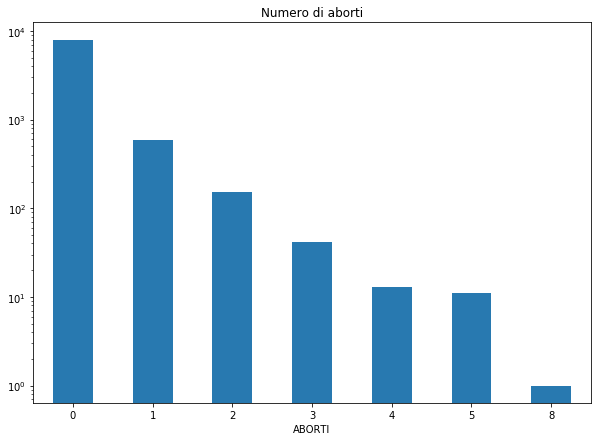

In [26]:
title_aborti = 'Numero di aborti'
ABORTI.plot(kind='bar', title = title_aborti, figsize=(10,7), rot=0, color='#2879b0', legend=False, logy=True)
plt.savefig("plots/aborti_barplot")

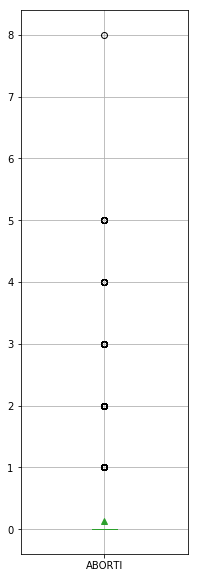

In [27]:
df.boxplot('ABORTI', figsize=(3,10), showmeans=True, rot=0)
plt.savefig("plots/aborti_boxplot")

In [107]:
ABORTI_PIE = ABORTI.sort_values(ascending=False)[:4]
ABORTI_PIE

ABORTI
0    7991
1     595
2     151
3      42
Name: ABORTI, dtype: int64

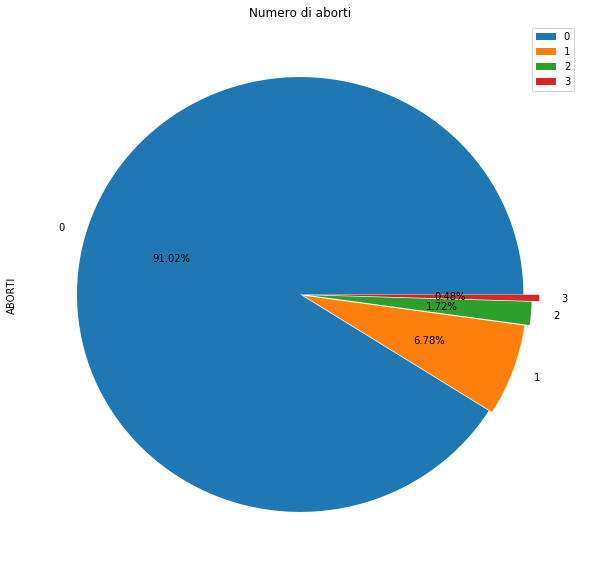

In [108]:
ABORTI_PIE.plot(kind='pie', figsize=(10,10), legend=True,\
                explode = explode[:len(ABORTI_PIE)],\
                title = title_aborti,\
                autopct='%1.2f%%', startangle=0)
plt.savefig("plots/aborti_pieplot")

### PRIMO_PAP

In [30]:
df['PRIMO_PAP'].describe()

count     8804
unique       2
top       True
freq      6572
Name: PRIMO_PAP, dtype: object

In [31]:
PRIMO_PAP = df.groupby('PRIMO_PAP')['PRIMO_PAP'].count()
print(PRIMO_PAP)

PRIMO_PAP
False    2232
True     6572
Name: PRIMO_PAP, dtype: int64


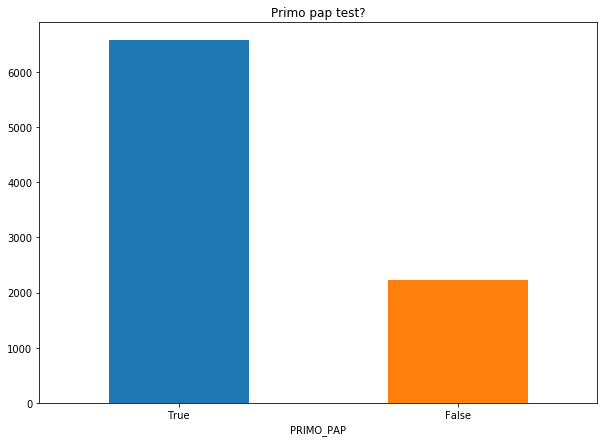

In [32]:
title_primo_pap = 'Primo pap test?'
PRIMO_PAP = PRIMO_PAP.sort_values(ascending=False)
PRIMO_PAP.plot(kind='bar', title = title_primo_pap, figsize=(10,7), rot=0, legend=False)
plt.savefig("plots/primo_pap_barplot")

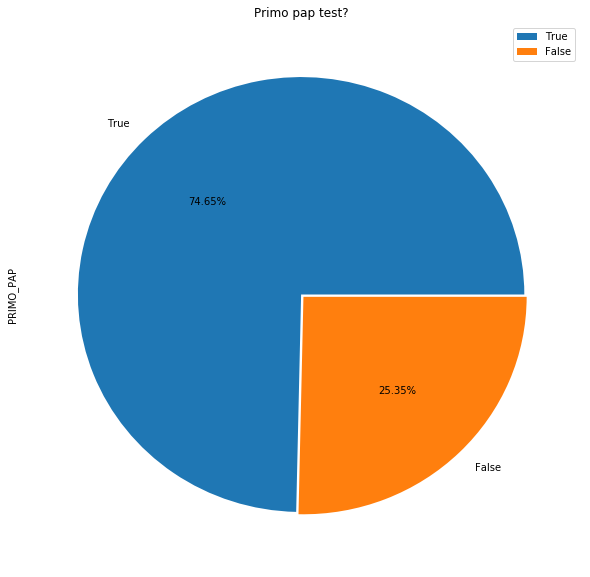

In [33]:
PRIMO_PAP.plot(kind='pie', figsize=(10,10), legend=True,\
               explode = explode[:len(PRIMO_PAP)],\
               title = title_primo_pap,
               autopct='%1.2f%%', startangle=0)
plt.savefig("plots/primo_pap_pieplot")

### CONTROLLO

In [34]:
df['CONTROLLO'].describe()

count    8208.000000
mean       11.906433
std         0.747861
min         3.000000
25%        12.000000
50%        12.000000
75%        12.000000
max        12.000000
Name: CONTROLLO, dtype: float64

In [35]:
title_controllo = 'Incidenza di periodi di controllo'
CONTROLLO = df.groupby('CONTROLLO')['CONTROLLO'].count()
CONTROLLO.index = CONTROLLO.index.astype('int64')
print(CONTROLLO)

CONTROLLO
3        2
6      125
12    8081
Name: CONTROLLO, dtype: int64


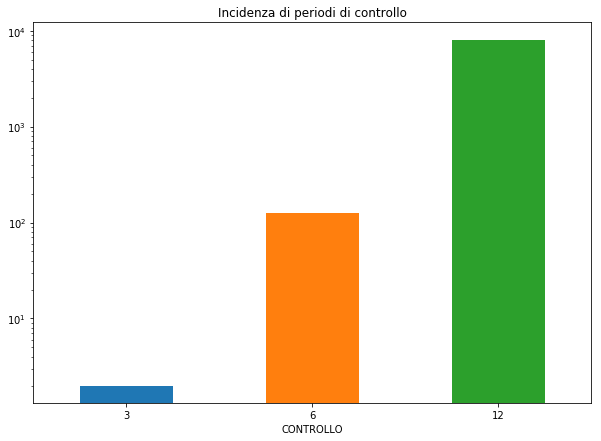

In [36]:
CONTROLLO.plot(kind='bar', title = title_controllo, figsize=(10,7), rot=0, legend=False, logy=True)
plt.savefig("plots/controllo_barplot")

### VALIDITA_CAMPIONE

In [37]:
df['VALIDITA_CAMPIONE'].describe()

count         8654
unique           3
top       ADEGUATO
freq          8624
Name: VALIDITA_CAMPIONE, dtype: object

In [38]:
VALIDITA_CAMPIONE = df.groupby('VALIDITA_CAMPIONE')['VALIDITA_CAMPIONE'].count()
print(VALIDITA_CAMPIONE)

VALIDITA_CAMPIONE
ADEGUATO       8624
INADEGUATO       28
SUBOTTIMALE       2
Name: VALIDITA_CAMPIONE, dtype: int64


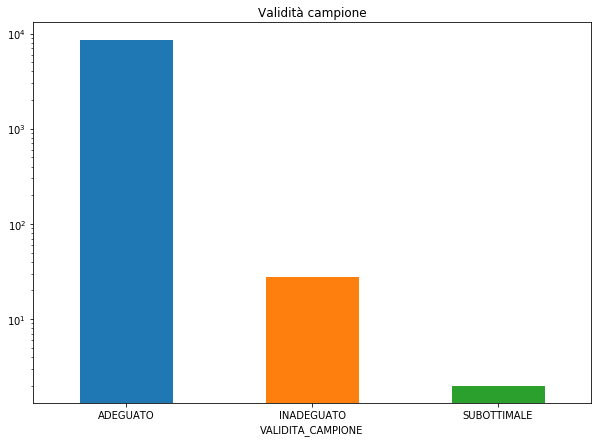

In [39]:
title_validita_campione = 'Validità campione'
VALIDITA_CAMPIONE.plot(kind='bar', title = title_validita_campione,\
                       figsize=(10,7), rot=0, legend=False, logy=True)
plt.savefig("plots/validita_campione_barplot")

### BATT

In [40]:
df['BATT'].describe()

count       1015
unique         9
top       COCCHI
freq         325
Name: BATT, dtype: object

In [41]:
BATT = df.groupby('BATT')['BATT'].count()
print(BATT)

BATT
ACTINOMYCES     13
CANDIDA        229
CLAMYDIA         1
COCCHI         325
DODERLEIN      228
FLOGOSI         85
GARDNERELLA      9
TRICHOMONAS      6
VAGINOSI       119
Name: BATT, dtype: int64


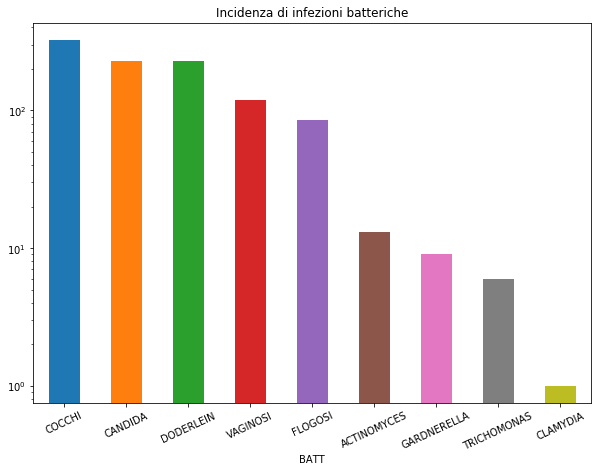

In [42]:
title_batt = 'Incidenza di infezioni batteriche'
BATT = BATT.sort_values(ascending=False)
BATT.plot(kind='bar', figsize=(10,7), title = title_batt, rot=25, legend=False, logy=True)
plt.savefig("plots/batt_barplot")

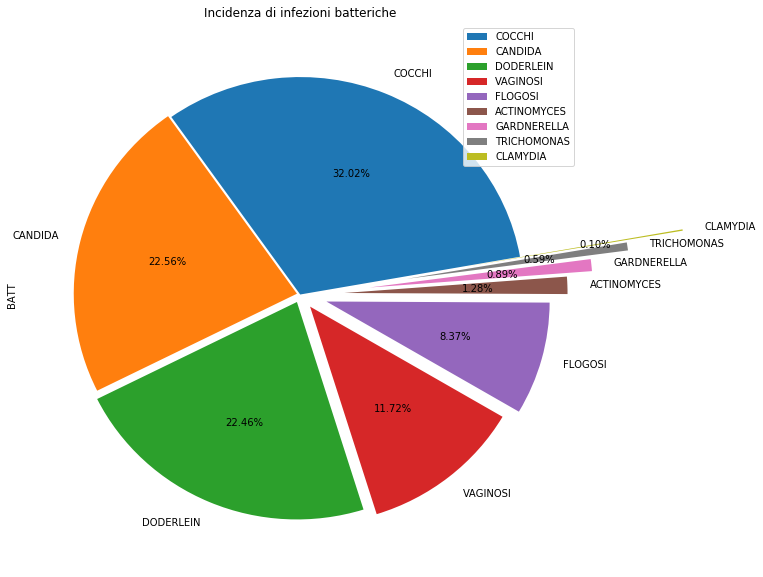

In [43]:
BATT.plot(kind='pie', figsize=(10,10), legend=True,\
          explode = explode[:len(BATT)],\
          title = title_batt,\
          autopct='%1.2f%%', startangle=10)
# plt.savefig("plots/batt_pieplot")

In [44]:
df['CITO'].describe()

count         8711
unique           9
top       NEGATIVO
freq          8447
Name: CITO, dtype: object

In [45]:
CITO = df.groupby('CITO')['CITO'].count()
print(CITO)

CITO
AGC-NEOPLASTIC       2
AGC-NOS              6
AIS                  1
ASC-H                2
ASCUS              129
HSIL                17
LSIL               106
NEGATIVO          8447
SCC                  1
Name: CITO, dtype: int64


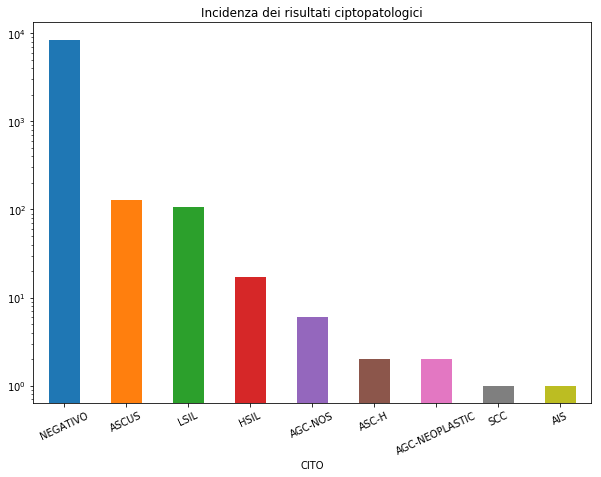

In [46]:
title_cito = 'Incidenza dei risultati ciptopatologici'
CITO = CITO.sort_values(ascending=False)
CITO.plot(kind='bar', title = title_cito, figsize=(10,7), rot=25, legend=False, logy=True)
plt.savefig("plots/cito_barplot")

In [47]:
CITO_PIE = CITO[:4]
CITO_PIE

CITO
NEGATIVO    8447
ASCUS        129
LSIL         106
HSIL          17
Name: CITO, dtype: int64

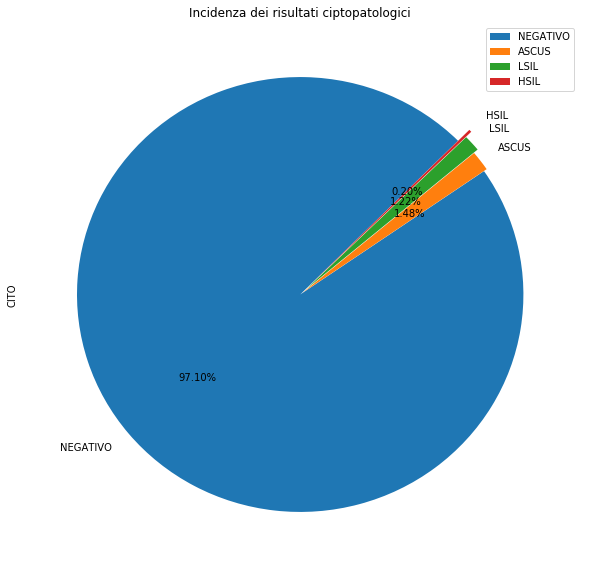

In [48]:
CITO_PIE.plot(kind='pie', figsize=(10,10), legend=True,\
              explode = explode[:len(CITO_PIE)],\
              title = title_cito,\
              autopct='%1.2f%%', startangle=45)
plt.savefig("plots/cito_pieplot")

In [49]:
print('number of columns: ',len(df.columns))
print(df.columns)

number of columns:  32
Index(['ETA_PRELIEVO', 'DATA_PRELIEVO', 'DATA_ULTIMA_MESTRUAZIONE',
       'DATA_PAP_PRECEDENTE', 'FORNICE', 'PORTIO', 'CAN_CERV', 'CAV_UT',
       'PERDITE_ER', 'LEUCORREA', 'PRURITO', 'TER_RAD', 'TER_ORM',
       'GRAVIDANZE', 'ABORTI', 'TEST_ESTR', 'TER_ANTIF', 'OP_GIN', 'MENOPAUSA',
       'AMENORREA', 'POST_PARTUM', 'PRIMO_PAP', 'CITO_PREC', 'VIRALE_PREC',
       'BATT_PREC', 'CONTROLLO', 'CTRL_ISTOLOGICO', 'VALIDITA_CAMPIONE',
       'CAUSA_CAMPIONE_NON_VALIDO', 'BATT', 'CITO', 'VIRALE'],
      dtype='object')


In [50]:
N_PERDITE_ER = len(df[df['PERDITE_ER'] == True])
N_LEUCORREA = len(df[df['LEUCORREA'] == True])
N_PRURITO = len(df[df['PRURITO'] == True])

SINTOMI = pd.Series({'PERDITE_ER':N_PERDITE_ER,'LEUCORREA':N_LEUCORREA,'PRURITO':N_PRURITO})
SINTOMI.rename('SINTOMI', inplace=True)
print(SINTOMI)

PERDITE_ER     12
LEUCORREA     147
PRURITO         2
Name: SINTOMI, dtype: int64


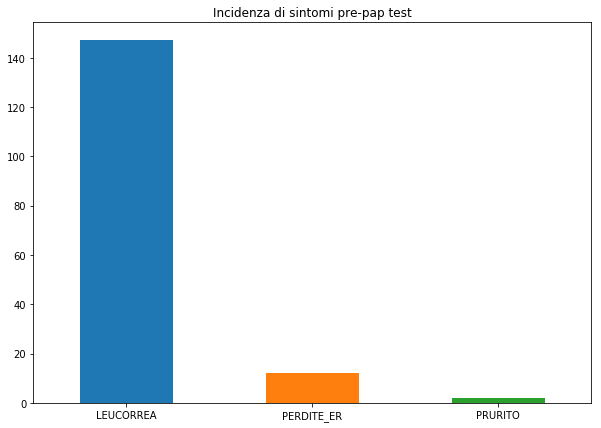

In [51]:
title_sintomi = 'Incidenza di sintomi pre-pap test'
SINTOMI = SINTOMI.sort_values(ascending=False)
SINTOMI.plot(kind='bar', figsize=(10,7), title = title_sintomi, legend = False, rot=0)
plt.savefig("plots/sintomi_barplot")

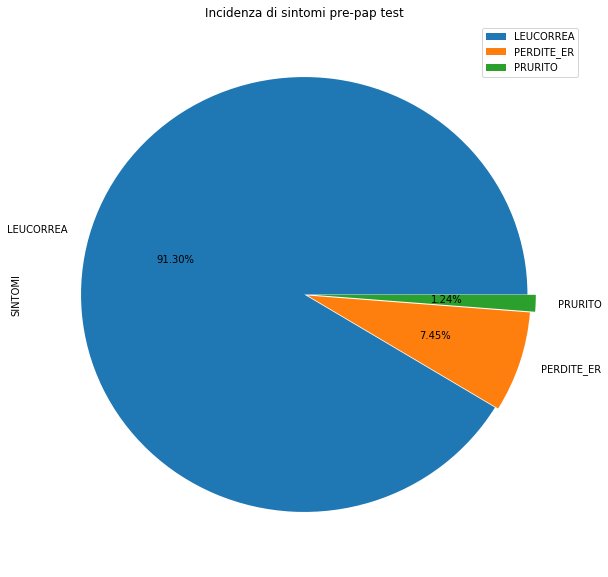

In [52]:
SINTOMI.plot(kind='pie', figsize=(10,10), legend=True,\
             explode = explode[:len(SINTOMI)],\
             title = title_sintomi,\
             autopct='%1.2f%%', startangle=0)
plt.savefig("plots/sintomi_pieplot")

In [53]:
N_MENOPAUSA = len(df[df['MENOPAUSA'] == True])
N_AMENORREA = len(df[df['AMENORREA'] == True])
N_POST_PARTUM = len(df[df['POST_PARTUM'] == True])

STATI_FISIOLOGICI = pd.Series({'MENOPAUSA':N_MENOPAUSA,'AMENORREA':N_AMENORREA,'POST_PARTUM':N_POST_PARTUM})
STATI_FISIOLOGICI.rename('STATI_FISIOLOGICI', inplace=True)
print(STATI_FISIOLOGICI)

MENOPAUSA      1116
AMENORREA        39
POST_PARTUM     118
Name: STATI_FISIOLOGICI, dtype: int64


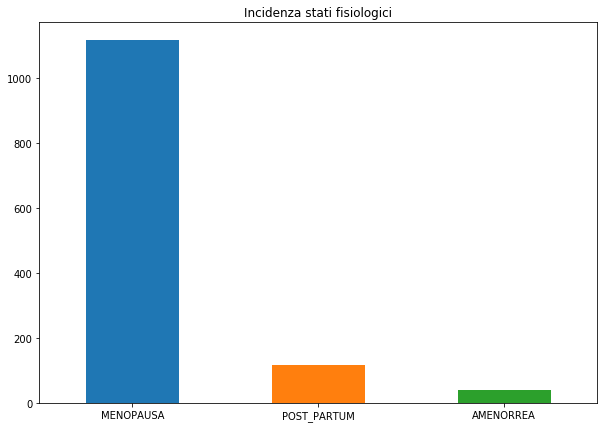

In [54]:
title_stati_fisiologici = 'Incidenza stati fisiologici'
STATI_FISIOLOGICI = STATI_FISIOLOGICI.sort_values(ascending=False)
STATI_FISIOLOGICI.plot(kind='bar', title = title_stati_fisiologici,\
                       legend = False, figsize=(10,7), rot=0)
plt.savefig("plots/stati_fisiologici_barplot")

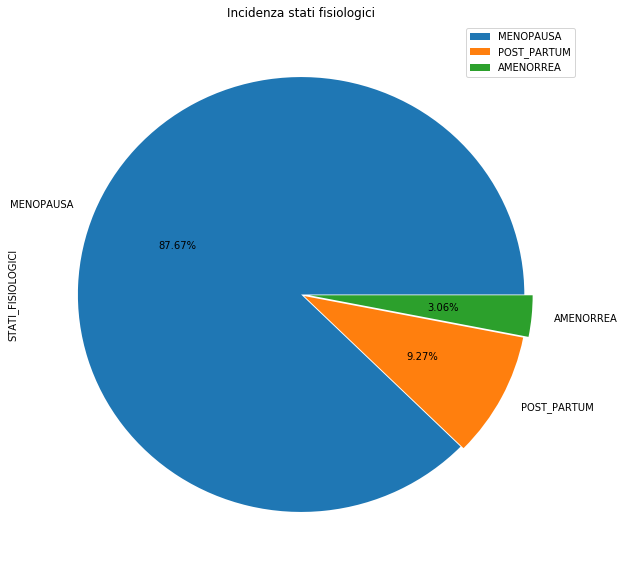

In [55]:
STATI_FISIOLOGICI.plot(kind='pie', figsize=(10,10), legend=True,\
                       explode = explode[:len(STATI_FISIOLOGICI)],\
                       title = title_stati_fisiologici,\
                       autopct='%1.2f%%', startangle=0)
plt.savefig("plots/stati_fisiologici_pieplot")

In [56]:
N_FORNICE = len(df[df['FORNICE'] == True])
N_PORTIO = len(df[df['PORTIO'] == True])
N_CAN_CERV = len(df[df['CAN_CERV'] == True])
N_CAV_UT = len(df[df['CAV_UT'] == True])

TIPO_PRELIEVO = pd.Series({'FORNICE':N_FORNICE,'PORTIO':N_PORTIO,'CAN_CERV':N_CAN_CERV, 'CAV_UT': N_CAV_UT})
TIPO_PRELIEVO.rename('TIPO_PRELIEVO', inplace=True)
print(TIPO_PRELIEVO)

FORNICE        4
PORTIO      8548
CAN_CERV    8537
CAV_UT       134
Name: TIPO_PRELIEVO, dtype: int64


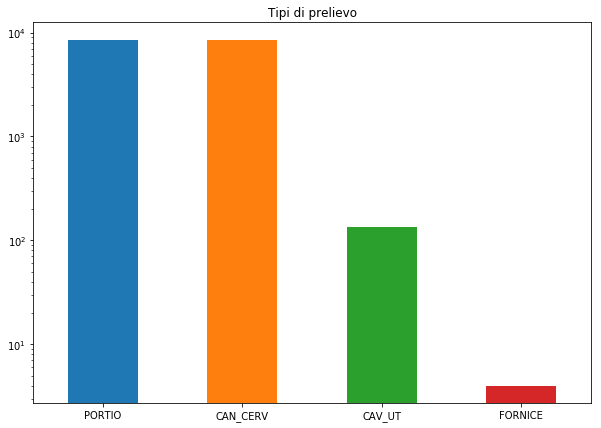

In [57]:
title_tipo_prelievo = 'Tipi di prelievo'
TIPO_PRELIEVO = TIPO_PRELIEVO.sort_values(ascending=False)
TIPO_PRELIEVO.plot(kind='bar', legend = False,\
                   title = title_tipo_prelievo,\
                   figsize=(10,7), rot=0, logy = True)
plt.savefig("plots/tipo_prelievo_barplot")

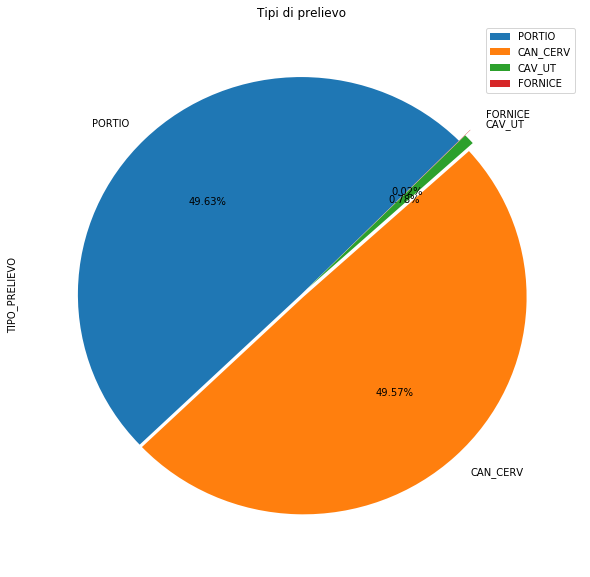

In [58]:
TIPO_PRELIEVO.plot(kind='pie', figsize=(10,10), legend=True,\
                   title = title_tipo_prelievo,\
                   explode = explode[:len(TIPO_PRELIEVO)],\
                   autopct='%1.2f%%', startangle=45)
plt.savefig("plots/tipo_prelievo_pieplot")

In [59]:
'TER_RAD', 'TER_ORM', 'OP_GIN'
N_TER_RAD = len(df[df['TER_RAD'] == True])
N_TER_ORM = len(df[df['TER_ORM'] == True])
N_OP_GIN = len(df[df['OP_GIN'] == True])

DATI_OBIETTIVI = pd.Series({'TER_RAD':N_TER_RAD,'TER_ORM':N_TER_ORM,'OP_GIN':N_OP_GIN})
DATI_OBIETTIVI.rename('DATI_OBIETTIVI', inplace=True)
print(DATI_OBIETTIVI)

TER_RAD       4
TER_ORM     422
OP_GIN     1408
Name: DATI_OBIETTIVI, dtype: int64


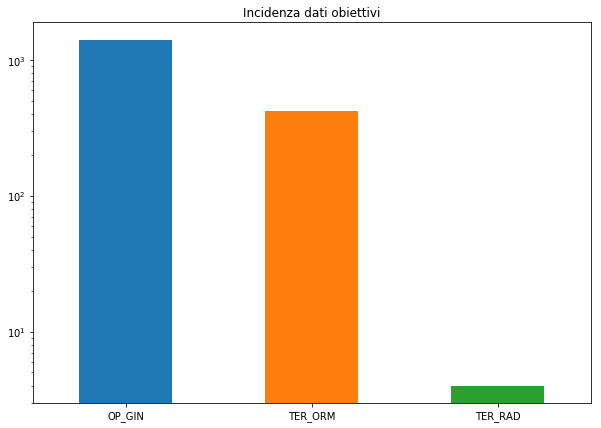

In [60]:
title_dati_obiettivi = 'Incidenza dati obiettivi'
DATI_OBIETTIVI = DATI_OBIETTIVI.sort_values(ascending=False)
DATI_OBIETTIVI.plot(kind='bar',legend = False,\
                    title = title_dati_obiettivi,\
                    figsize=(10,7), rot=0, logy = True)
plt.savefig("plots/dati_obiettivi_barplot")

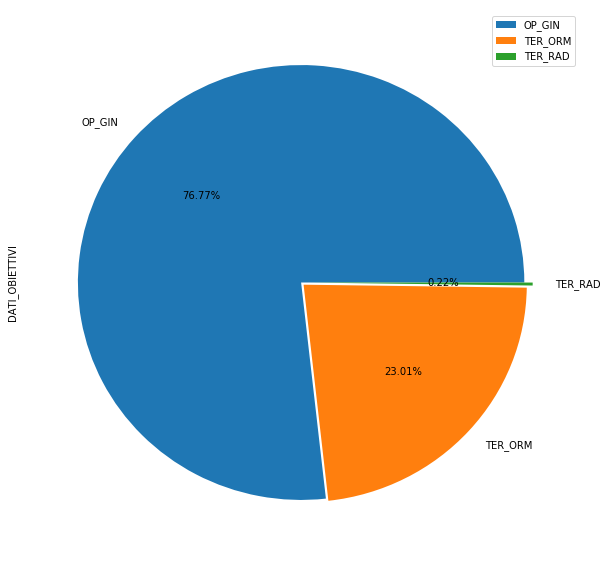

In [61]:
DATI_OBIETTIVI.plot(kind='pie', figsize=(10,10), legend=True,\
                explode = explode[:len(DATI_OBIETTIVI)],\
                autopct='%1.2f%%', startangle=0)
plt.savefig("plots/dati_obiettivi_pieplot")

In [62]:
N_TEST_ESTR = len(df[df['TEST_ESTR'] == True])
N_TER_ANTIF = len(df[df['TER_ANTIF'] == True])

TEST_CONSIGLIATI = pd.Series({'TEST_ESTR':N_TEST_ESTR,'TER_ANTIF':N_TER_ANTIF})
TEST_CONSIGLIATI.rename('TEST_CONSIGLIATI', inplace=True)
print(TEST_CONSIGLIATI)

TEST_ESTR      4
TER_ANTIF    416
Name: TEST_CONSIGLIATI, dtype: int64


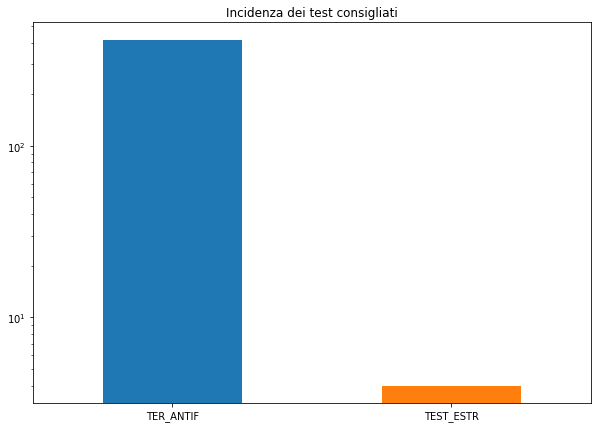

In [63]:
title_test_consigliati = 'Incidenza dei test consigliati'
TEST_CONSIGLIATI = TEST_CONSIGLIATI.sort_values(ascending=False)
TEST_CONSIGLIATI.plot(kind='bar', legend = False,\
                      title = title_test_consigliati,\
                      figsize=(10,7), rot=0, logy = True)
plt.savefig("plots/test_consigliati_pieplot")

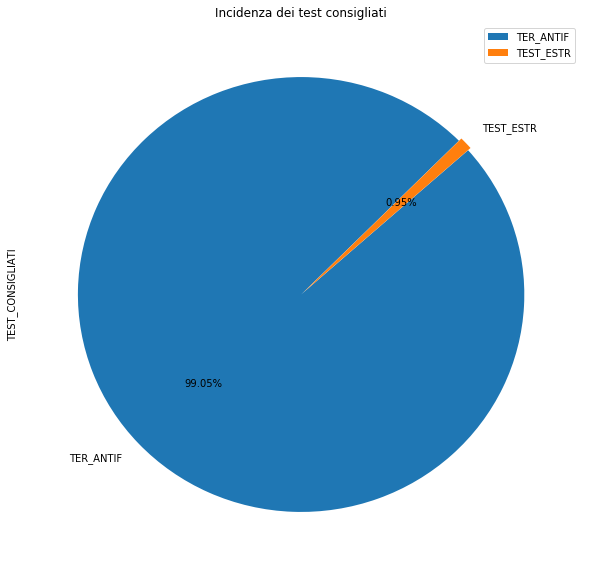

In [64]:
TEST_CONSIGLIATI.plot(kind='pie', figsize=(10,10), legend=True,\
                      title = title_test_consigliati,\
                      explode = explode[:len(TEST_CONSIGLIATI)],\
                      autopct='%1.2f%%', startangle=45)
plt.savefig("plots/test_consigliati_barplot")

In [65]:
DELTA_PREL_MESTR = pd.DataFrame({'ID': [i for i in range(8804)], 'DELTA': df['DATA_PRELIEVO'] - df['DATA_ULTIMA_MESTRUAZIONE']})
DELTA_PREL_MESTR.dropna(inplace=True)
DELTA_PREL_MESTR['DELTA'] = DELTA_PREL_MESTR['DELTA'].astype('timedelta64[M]')
DELTA_PREL_MESTR['DELTA'].describe()

count    5075.000000
mean        1.044335
std         6.953461
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max       277.000000
Name: DELTA, dtype: float64

In [66]:
DELTA_PREL_MESTR = DELTA_PREL_MESTR.groupby('DELTA')['ID'].count()
DELTA_PREL_MESTR.rename('DELTA (PRELIEVO - ULTIMA MESTR.)', inplace=True)
DELTA_PREL_MESTR.index = DELTA_PREL_MESTR.index.astype('int64')
DELTA_PREL_MESTR

DELTA
0      3313
1      1320
2       191
3        57
4        39
5        27
6        16
7         7
8         7
9        11
10       11
11       10
12        1
13        8
14        5
15        5
16        2
17        4
18        3
19        1
20        1
22        5
23        1
24        2
25        1
27        3
28        1
32        1
33        2
34        4
44        1
45        1
50        1
61        1
65        1
68        1
73        1
82        1
91        1
96        1
97        1
119       2
120       1
206       1
277       1
Name: DELTA (PRELIEVO - ULTIMA MESTR.), dtype: int64

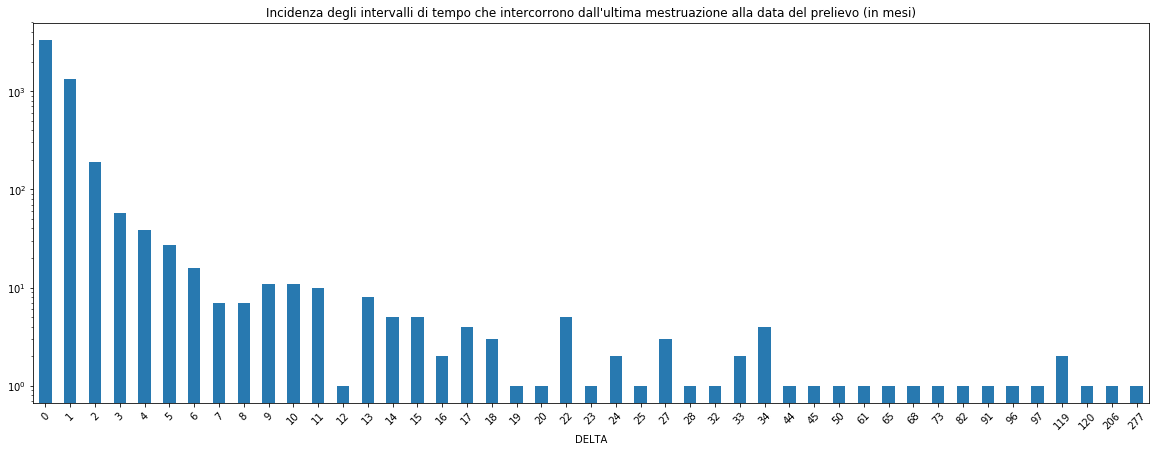

In [67]:
title_delta_prel_mestr = 'Incidenza degli intervalli di tempo che intercorrono dall\'ultima mestruazione alla data del prelievo (in mesi)'
DELTA_PREL_MESTR.plot(kind='bar', figsize=(20,7),\
                      title = title_delta_prel_mestr,\
                      legend = False, rot=45, color='#2879b0', logy = True)
plt.savefig("plots/delta_data_prelievo_ultima_mestruazione_barplot")

In [68]:
df.columns

Index(['ETA_PRELIEVO', 'DATA_PRELIEVO', 'DATA_ULTIMA_MESTRUAZIONE',
       'DATA_PAP_PRECEDENTE', 'FORNICE', 'PORTIO', 'CAN_CERV', 'CAV_UT',
       'PERDITE_ER', 'LEUCORREA', 'PRURITO', 'TER_RAD', 'TER_ORM',
       'GRAVIDANZE', 'ABORTI', 'TEST_ESTR', 'TER_ANTIF', 'OP_GIN', 'MENOPAUSA',
       'AMENORREA', 'POST_PARTUM', 'PRIMO_PAP', 'CITO_PREC', 'VIRALE_PREC',
       'BATT_PREC', 'CONTROLLO', 'CTRL_ISTOLOGICO', 'VALIDITA_CAMPIONE',
       'CAUSA_CAMPIONE_NON_VALIDO', 'BATT', 'CITO', 'VIRALE'],
      dtype='object')

## Cross-variable analysis

### DATA_PRELIEVO x CITO

In [69]:
CROSS_DATA_PRELIEVO_CITO = pd.DataFrame(df[['DATA_PRELIEVO', 'CITO']])
CROSS_DATA_PRELIEVO_CITO['DATA_PRELIEVO'] = CROSS_DATA_PRELIEVO_CITO['DATA_PRELIEVO'].apply(lambda x: x.year if isinstance(x, pd.Timestamp) else np.NaN)
CROSS_DATA_PRELIEVO_CITO['DATA_PRELIEVO'] = CROSS_DATA_PRELIEVO_CITO[CROSS_DATA_PRELIEVO_CITO['DATA_PRELIEVO'] > 2012]
CROSS_DATA_PRELIEVO_CITO.dropna(inplace=True)
CROSS_DATA_PRELIEVO_CITO.head()

,DATA_PRELIEVO,CITO
0,2018,AGC-NOS
1,2015,NEGATIVO
2,2015,ASCUS
3,2016,AGC-NOS
4,2016,NEGATIVO


In [70]:
CROSS_DATA_PRELIEVO_CITO = CROSS_DATA_PRELIEVO_CITO.groupby(['DATA_PRELIEVO', 'CITO'])['CITO'].count()
CROSS_DATA_PRELIEVO_CITO.index = pd.MultiIndex.from_tuples([(int(ix[0]), ix[1]) for ix in CROSS_DATA_PRELIEVO_CITO.index.tolist()])
CROSS_DATA_PRELIEVO_CITO.rename('PCT', inplace=True)
CROSS_DATA_PRELIEVO_CITO

2013  ASCUS               13
      LSIL                11
      NEGATIVO          1393
2014  AIS                  1
      ASC-H                1
      ASCUS               24
      HSIL                 2
      LSIL                22
      NEGATIVO          1906
2015  ASCUS               16
      HSIL                 5
      LSIL                27
      NEGATIVO          1737
      SCC                  1
2016  AGC-NEOPLASTIC       1
      AGC-NOS              5
      ASC-H                1
      ASCUS               43
      HSIL                 6
      LSIL                25
      NEGATIVO          1601
2017  AGC-NEOPLASTIC       1
      ASCUS               26
      HSIL                 1
      LSIL                13
      NEGATIVO          1351
2018  AGC-NOS              1
      ASCUS                7
      HSIL                 3
      LSIL                 7
      NEGATIVO           442
Name: PCT, dtype: int64

In [71]:
CROSS_DATA_PRELIEVO_CITO = CROSS_DATA_PRELIEVO_CITO.to_frame()
CROSS_DATA_PRELIEVO_CITO.index = CROSS_DATA_PRELIEVO_CITO.index.set_names(['ANNO', 'CITO'])
CROSS_DATA_PRELIEVO_CITO

PCT
ANNO CITO                
2013 ASCUS             13
     LSIL              11
     NEGATIVO        1393
2014 AIS                1
     ASC-H              1
     ASCUS             24
     HSIL               2
     LSIL              22
     NEGATIVO        1906
2015 ASCUS             16
     HSIL               5
     LSIL              27
     NEGATIVO        1737
     SCC                1
2016 AGC-NEOPLASTIC     1
     AGC-NOS            5
     ASC-H              1
     ASCUS             43
     HSIL               6
     LSIL              25
     NEGATIVO        1601
2017 AGC-NEOPLASTIC     1
     ASCUS             26
     HSIL               1
     LSIL              13
     NEGATIVO        1351
2018 AGC-NOS            1
     ASCUS              7
     HSIL               3
     LSIL               7
     NEGATIVO         442

In [72]:
CROSS_DATA_PRELIEVO_CITO = CROSS_DATA_PRELIEVO_CITO.groupby(level=[0]).apply(lambda x: x / x.sum() * 100)
CROSS_DATA_PRELIEVO_CITO.reset_index(inplace=True)
CROSS_DATA_PRELIEVO_CITO

,ANNO,CITO,PCT
0,2013,ASCUS,0.917431
1,2013,LSIL,0.776288
2,2013,NEGATIVO,98.306281
3,2014,AIS,0.051125
4,2014,ASC-H,0.051125
5,2014,ASCUS,1.226994
6,2014,HSIL,0.102249
7,2014,LSIL,1.124744
8,2014,NEGATIVO,97.443763
9,2015,ASCUS,0.895857


In [73]:
CROSS_DATA_PRELIEVO_CITO = CROSS_DATA_PRELIEVO_CITO.pivot(index='ANNO', columns='CITO', values='PCT')

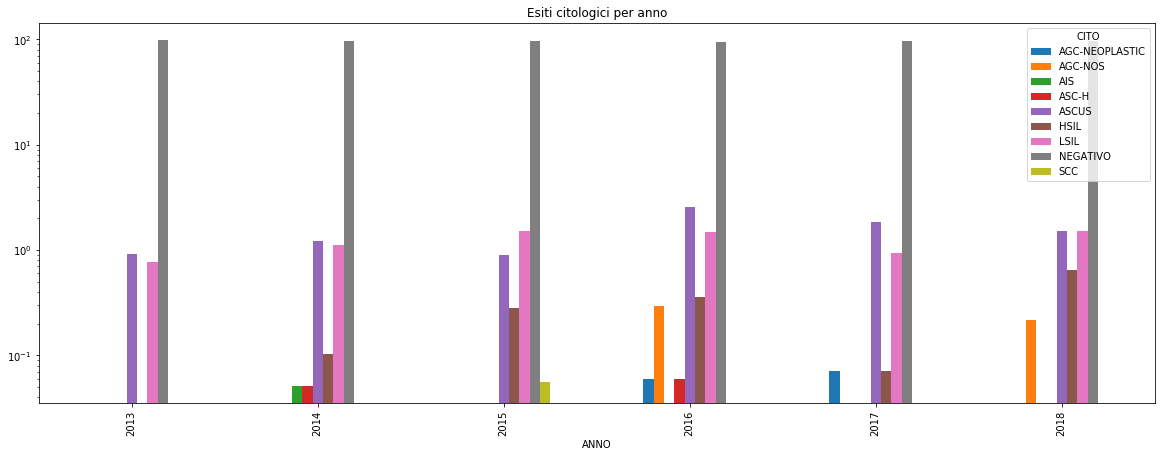

In [74]:
title_cross_data_prelievo_cito = 'Esiti citologici per anno'
CROSS_DATA_PRELIEVO_CITO.plot(kind='bar', legend = True,\
                              title = title_cross_data_prelievo_cito,\
                              figsize=(20,7), rot=90, logy = True)
plt.savefig("plots/cross_data_prelievo_cito_barplot")

### DATA_PRELIEVO x BATT

In [75]:
CROSS_DATA_PRELIEVO_BATT = pd.DataFrame(df[['DATA_PRELIEVO', 'BATT']])
CROSS_DATA_PRELIEVO_BATT['DATA_PRELIEVO'] = CROSS_DATA_PRELIEVO_BATT['DATA_PRELIEVO'].apply(lambda x: x.year if isinstance(x, pd.Timestamp) else np.NaN)
CROSS_DATA_PRELIEVO_BATT['DATA_PRELIEVO'] = CROSS_DATA_PRELIEVO_BATT[(CROSS_DATA_PRELIEVO_BATT['DATA_PRELIEVO'] > 2012)]
CROSS_DATA_PRELIEVO_BATT.dropna(inplace=True)
CROSS_DATA_PRELIEVO_BATT.head()

,DATA_PRELIEVO,BATT
1,2015,CANDIDA
4,2016,DODERLEIN
5,2016,COCCHI
6,2016,COCCHI
7,2016,COCCHI


In [76]:
CROSS_DATA_PRELIEVO_BATT = CROSS_DATA_PRELIEVO_BATT.groupby(['DATA_PRELIEVO', 'BATT'])['BATT'].count()
CROSS_DATA_PRELIEVO_BATT.index = pd.MultiIndex.from_tuples([(int(ix[0]), ix[1]) for ix in CROSS_DATA_PRELIEVO_BATT.index.tolist()])
CROSS_DATA_PRELIEVO_BATT.rename('PCT', inplace=True)
CROSS_DATA_PRELIEVO_BATT

2013  CANDIDA         40
      COCCHI          47
      DODERLEIN       12
      FLOGOSI          1
      TRICHOMONAS      1
      VAGINOSI         3
2014  ACTINOMYCES      5
      CANDIDA         74
      COCCHI          69
      DODERLEIN       15
      FLOGOSI          4
      TRICHOMONAS      1
      VAGINOSI         9
2015  ACTINOMYCES      5
      CANDIDA         46
      CLAMYDIA         1
      COCCHI          72
      DODERLEIN       22
      FLOGOSI          5
      TRICHOMONAS      1
      VAGINOSI         4
2016  ACTINOMYCES      3
      CANDIDA         32
      COCCHI          82
      DODERLEIN      149
      FLOGOSI         13
      GARDNERELLA      7
      TRICHOMONAS      1
      VAGINOSI        30
2017  CANDIDA         25
      COCCHI          41
      DODERLEIN       28
      FLOGOSI         47
      GARDNERELLA      1
      TRICHOMONAS      2
      VAGINOSI        47
2018  CANDIDA         10
      COCCHI          14
      DODERLEIN        2
      FLOGOSI         15


In [77]:
CROSS_DATA_PRELIEVO_BATT = CROSS_DATA_PRELIEVO_BATT.to_frame()
CROSS_DATA_PRELIEVO_BATT.index = CROSS_DATA_PRELIEVO_BATT.index.set_names(['ANNO', 'BATT'])
CROSS_DATA_PRELIEVO_BATT

PCT
ANNO BATT            
2013 CANDIDA       40
     COCCHI        47
     DODERLEIN     12
     FLOGOSI        1
     TRICHOMONAS    1
     VAGINOSI       3
2014 ACTINOMYCES    5
     CANDIDA       74
     COCCHI        69
     DODERLEIN     15
     FLOGOSI        4
     TRICHOMONAS    1
     VAGINOSI       9
2015 ACTINOMYCES    5
     CANDIDA       46
     CLAMYDIA       1
     COCCHI        72
     DODERLEIN     22
     FLOGOSI        5
     TRICHOMONAS    1
     VAGINOSI       4
2016 ACTINOMYCES    3
     CANDIDA       32
     COCCHI        82
     DODERLEIN    149
     FLOGOSI       13
     GARDNERELLA    7
     TRICHOMONAS    1
     VAGINOSI      30
2017 CANDIDA       25
     COCCHI        41
     DODERLEIN     28
     FLOGOSI       47
     GARDNERELLA    1
     TRICHOMONAS    2
     VAGINOSI      47
2018 CANDIDA       10
     COCCHI        14
     DODERLEIN      2
     FLOGOSI       15
     GARDNERELLA    1
     VAGINOSI      26

In [78]:
CROSS_DATA_PRELIEVO_BATT = CROSS_DATA_PRELIEVO_BATT.groupby(level=[0]).apply(lambda x: x / x.sum() * 100)
CROSS_DATA_PRELIEVO_BATT.reset_index(inplace=True)
CROSS_DATA_PRELIEVO_BATT

,ANNO,BATT,PCT
0,2013,CANDIDA,38.461538
1,2013,COCCHI,45.192308
2,2013,DODERLEIN,11.538462
3,2013,FLOGOSI,0.961538
4,2013,TRICHOMONAS,0.961538
5,2013,VAGINOSI,2.884615
6,2014,ACTINOMYCES,2.824859
7,2014,CANDIDA,41.807910
8,2014,COCCHI,38.983051
9,2014,DODERLEIN,8.474576


In [79]:
CROSS_DATA_PRELIEVO_BATT = CROSS_DATA_PRELIEVO_BATT.pivot(index='ANNO', columns='BATT', values='PCT')

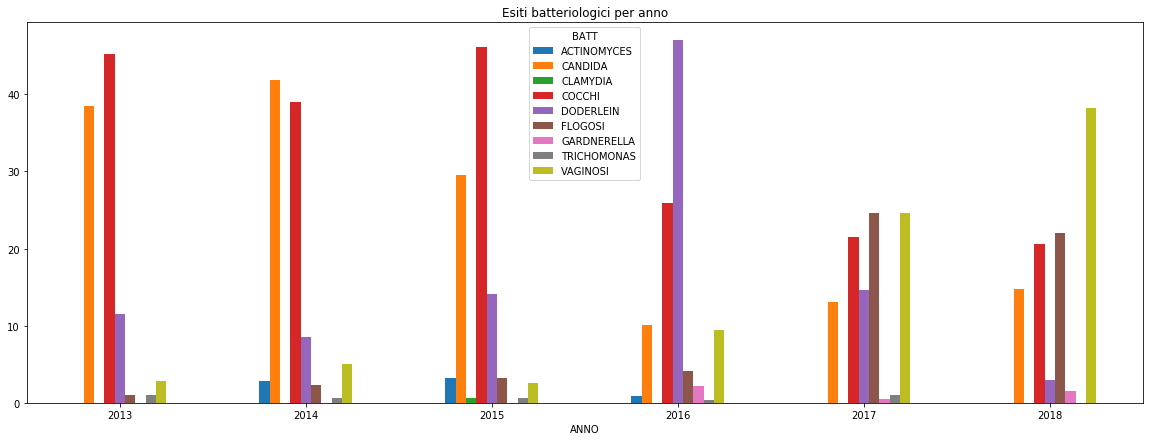

In [80]:
title_cross_data_prelievo_batt = 'Esiti batteriologici per anno'

CROSS_DATA_PRELIEVO_BATT.plot(kind='bar', legend = True,\
                              title = title_cross_data_prelievo_batt,\
                              figsize=(20,7), rot=0, logy = False)
plt.savefig("plots/cross_data_prelievo_batt_barplot")

### BATT x CITO

In [81]:
CROSS_BATT_CITO = pd.DataFrame(df[['BATT', 'CITO']])
CROSS_BATT_CITO.dropna(inplace=True)
CROSS_BATT_CITO.head()

,BATT,CITO
1,CANDIDA,NEGATIVO
4,DODERLEIN,NEGATIVO
5,COCCHI,NEGATIVO
6,COCCHI,NEGATIVO
7,COCCHI,NEGATIVO


In [82]:
CROSS_BATT_CITO = CROSS_BATT_CITO.groupby(['BATT', 'CITO'])['CITO'].count()
CROSS_BATT_CITO.rename('PCT', inplace=True)
CROSS_BATT_CITO

BATT         CITO    
ACTINOMYCES  ASCUS         1
             NEGATIVO     12
CANDIDA      ASCUS         1
             LSIL          3
             NEGATIVO    222
CLAMYDIA     ASCUS         1
COCCHI       NEGATIVO    321
DODERLEIN    NEGATIVO    227
FLOGOSI      ASCUS         1
             NEGATIVO     77
GARDNERELLA  ASCUS         1
             NEGATIVO      7
TRICHOMONAS  NEGATIVO      5
VAGINOSI     AGC-NOS       1
             ASCUS        11
             HSIL          2
             LSIL         12
             NEGATIVO     85
Name: PCT, dtype: int64

In [83]:
CROSS_BATT_CITO = CROSS_BATT_CITO.to_frame()
CROSS_BATT_CITO.index = CROSS_BATT_CITO.index.set_names(['BATT', 'CITO'])
CROSS_BATT_CITO

PCT
BATT        CITO         
ACTINOMYCES ASCUS       1
            NEGATIVO   12
CANDIDA     ASCUS       1
            LSIL        3
            NEGATIVO  222
CLAMYDIA    ASCUS       1
COCCHI      NEGATIVO  321
DODERLEIN   NEGATIVO  227
FLOGOSI     ASCUS       1
            NEGATIVO   77
GARDNERELLA ASCUS       1
            NEGATIVO    7
TRICHOMONAS NEGATIVO    5
VAGINOSI    AGC-NOS     1
            ASCUS      11
            HSIL        2
            LSIL       12
            NEGATIVO   85

In [84]:
CROSS_BATT_CITO = CROSS_BATT_CITO.groupby(level=[0]).apply(lambda x: x / x.sum() * 100)
CROSS_BATT_CITO.reset_index(inplace=True)
CROSS_BATT_CITO

,BATT,CITO,PCT
0,ACTINOMYCES,ASCUS,7.692308
1,ACTINOMYCES,NEGATIVO,92.307692
2,CANDIDA,ASCUS,0.442478
3,CANDIDA,LSIL,1.327434
4,CANDIDA,NEGATIVO,98.230088
5,CLAMYDIA,ASCUS,100.000000
6,COCCHI,NEGATIVO,100.000000
7,DODERLEIN,NEGATIVO,100.000000
8,FLOGOSI,ASCUS,1.282051
9,FLOGOSI,NEGATIVO,98.717949


In [85]:
CROSS_BATT_CITO = CROSS_BATT_CITO.pivot(index='BATT', columns='CITO', values='PCT')

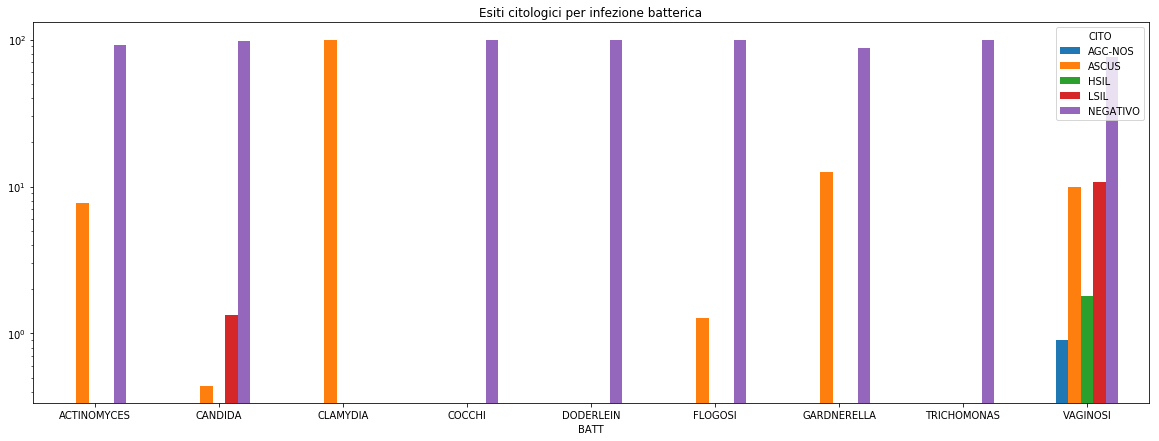

In [86]:
title_cross_batt_cito = 'Esiti citologici per infezione batterica'

CROSS_BATT_CITO.plot(kind='bar', legend = True,\
                     title = title_cross_batt_cito,\
                     figsize=(20,7), rot=0, logy = True)
plt.savefig("plots/cross_batt_cito_barplot")

### ETA_PRELIEVO x CITO

In [87]:
CROSS_ETA_CITO = pd.DataFrame(df[['ETA_PRELIEVO', 'CITO']])
CROSS_ETA_CITO['FASCIA_ETA'] = pd.cut(CROSS_ETA_CITO['ETA_PRELIEVO'], [10,25,35,45,55,65,75,90],\
                                      labels=['10-25','25-35','35-45','45-55','55-65','65-75','75-90'])
CROSS_ETA_CITO = CROSS_ETA_CITO[['FASCIA_ETA','CITO']]
CROSS_ETA_CITO.dropna(inplace=True)
CROSS_ETA_CITO.head()

,FASCIA_ETA,CITO
0,45-55,AGC-NOS
1,45-55,NEGATIVO
2,35-45,ASCUS
3,65-75,AGC-NOS
4,35-45,NEGATIVO


In [88]:
CROSS_ETA_CITO = CROSS_ETA_CITO.groupby(['FASCIA_ETA', 'CITO'])['CITO'].count()
CROSS_ETA_CITO.rename('PCT', inplace=True)
CROSS_ETA_CITO

FASCIA_ETA  CITO          
10-25       AGC-NOS              1
            ASCUS               20
            HSIL                 1
            LSIL                25
            NEGATIVO           655
25-35       AGC-NOS              1
            AIS                  1
            ASCUS               49
            HSIL                 8
            LSIL                39
            NEGATIVO          1955
35-45       AGC-NOS              1
            ASCUS               20
            HSIL                 3
            LSIL                23
            NEGATIVO          2447
            SCC                  1
45-55       AGC-NEOPLASTIC       1
            AGC-NOS              2
            ASC-H                2
            ASCUS               30
            HSIL                 4
            LSIL                18
            NEGATIVO          2103
55-65       AGC-NEOPLASTIC       1
            ASCUS                9
            HSIL                 1
            LSIL            

In [89]:
CROSS_ETA_CITO = CROSS_ETA_CITO.to_frame()
CROSS_ETA_CITO.index = CROSS_ETA_CITO.index.set_names(['FASCIA_ETA', 'CITO'])
CROSS_ETA_CITO

PCT
FASCIA_ETA CITO                
10-25      AGC-NOS            1
           ASCUS             20
           HSIL               1
           LSIL              25
           NEGATIVO         655
25-35      AGC-NOS            1
           AIS                1
           ASCUS             49
           HSIL               8
           LSIL              39
           NEGATIVO        1955
35-45      AGC-NOS            1
           ASCUS             20
           HSIL               3
           LSIL              23
           NEGATIVO        2447
           SCC                1
45-55      AGC-NEOPLASTIC     1
           AGC-NOS            2
           ASC-H              2
           ASCUS             30
           HSIL               4
           LSIL              18
           NEGATIVO        2103
55-65      AGC-NEOPLASTIC     1
           ASCUS              9
           HSIL               1
           LSIL               1
           NEGATIVO         866
65-75      AGC-NOS            1
           NEGATIVO         350
75-90      ASCUS              1
           NEGATIVO          71

In [90]:
CROSS_ETA_CITO = CROSS_ETA_CITO.groupby(level=[0]).apply(lambda x: x / x.sum() * 100)
CROSS_ETA_CITO.reset_index(inplace=True)
CROSS_ETA_CITO

,FASCIA_ETA,CITO,PCT
0,10-25,AGC-NOS,0.142450
1,10-25,ASCUS,2.849003
2,10-25,HSIL,0.142450
3,10-25,LSIL,3.561254
4,10-25,NEGATIVO,93.304843
5,25-35,AGC-NOS,0.048709
6,25-35,AIS,0.048709
7,25-35,ASCUS,2.386751
8,25-35,HSIL,0.389674
9,25-35,LSIL,1.899659


In [91]:
CROSS_ETA_CITO = CROSS_ETA_CITO.pivot(index='FASCIA_ETA', columns='CITO', values='PCT')

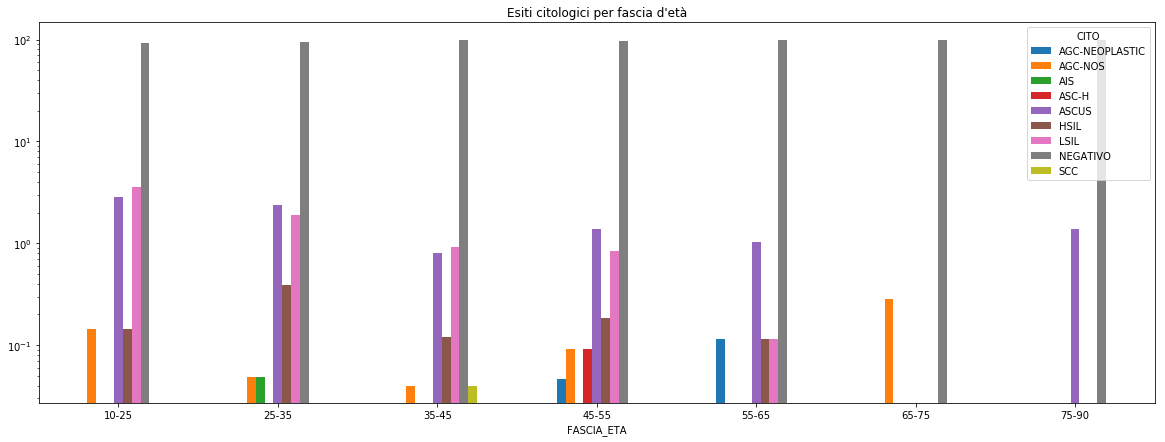

In [92]:
title_cross_eta_cito = 'Esiti citologici per fascia d\'età'

CROSS_ETA_CITO.plot(kind='bar', legend = True,\
                     title = title_cross_eta_cito,\
                     figsize=(20,7), rot=0, logy = True)
plt.savefig("plots/cross_eta_cito_barplot")

### ETA_PRELIEVO x BATT

In [93]:
CROSS_ETA_BATT = pd.DataFrame(df[['ETA_PRELIEVO', 'BATT']])
CROSS_ETA_BATT['FASCIA_ETA'] = pd.cut(CROSS_ETA_BATT['ETA_PRELIEVO'], [10,25,35,45,55,65,75,90],\
                                      labels=['10-25','25-35','35-45','45-55','55-65','65-75','75-90'])
CROSS_ETA_BATT = CROSS_ETA_BATT[['FASCIA_ETA','BATT']]
CROSS_ETA_BATT.dropna(inplace=True)
CROSS_ETA_BATT.head()

,FASCIA_ETA,BATT
1,45-55,CANDIDA
4,35-45,DODERLEIN
5,10-25,COCCHI
6,25-35,COCCHI
7,25-35,COCCHI


In [94]:
CROSS_ETA_BATT = CROSS_ETA_BATT.groupby(['FASCIA_ETA', 'BATT'])['BATT'].count()
CROSS_ETA_BATT.rename('PCT', inplace=True)
CROSS_ETA_BATT

FASCIA_ETA  BATT       
10-25       CANDIDA         41
            COCCHI          38
            DODERLEIN       37
            FLOGOSI          6
            GARDNERELLA      1
            TRICHOMONAS      1
            VAGINOSI        17
25-35       CANDIDA         69
            COCCHI          91
            DODERLEIN       67
            FLOGOSI         22
            GARDNERELLA      2
            TRICHOMONAS      1
            VAGINOSI        32
35-45       ACTINOMYCES      2
            CANDIDA         76
            CLAMYDIA         1
            COCCHI          82
            DODERLEIN       72
            FLOGOSI         29
            GARDNERELLA      3
            TRICHOMONAS      2
            VAGINOSI        27
45-55       ACTINOMYCES      9
            CANDIDA         38
            COCCHI         100
            DODERLEIN       47
            FLOGOSI         15
            GARDNERELLA      3
            TRICHOMONAS      2
            VAGINOSI        35
55-65       ACT

In [95]:
CROSS_ETA_BATT = CROSS_ETA_BATT.to_frame()
CROSS_ETA_BATT.index = CROSS_ETA_BATT.index.set_names(['FASCIA_ETA', 'BATT'])
CROSS_ETA_BATT

PCT
FASCIA_ETA BATT            
10-25      CANDIDA       41
           COCCHI        38
           DODERLEIN     37
           FLOGOSI        6
           GARDNERELLA    1
           TRICHOMONAS    1
           VAGINOSI      17
25-35      CANDIDA       69
           COCCHI        91
           DODERLEIN     67
           FLOGOSI       22
           GARDNERELLA    2
           TRICHOMONAS    1
           VAGINOSI      32
35-45      ACTINOMYCES    2
           CANDIDA       76
           CLAMYDIA       1
           COCCHI        82
           DODERLEIN     72
           FLOGOSI       29
           GARDNERELLA    3
           TRICHOMONAS    2
           VAGINOSI      27
45-55      ACTINOMYCES    9
           CANDIDA       38
           COCCHI       100
           DODERLEIN     47
           FLOGOSI       15
           GARDNERELLA    3
           TRICHOMONAS    2
           VAGINOSI      35
55-65      ACTINOMYCES    2
           CANDIDA        5
           COCCHI        12
           DODERLEIN      4
           FLOGOSI       10
           VAGINOSI       8
65-75      COCCHI         1
           DODERLEIN      1
           FLOGOSI        3
75-90      COCCHI         1

In [96]:
CROSS_ETA_BATT = CROSS_ETA_BATT.groupby(level=[0]).apply(lambda x: x / x.sum() * 100)
CROSS_ETA_BATT.reset_index(inplace=True)
CROSS_ETA_BATT

,FASCIA_ETA,BATT,PCT
0,10-25,CANDIDA,29.078014
1,10-25,COCCHI,26.950355
2,10-25,DODERLEIN,26.241135
3,10-25,FLOGOSI,4.255319
4,10-25,GARDNERELLA,0.709220
5,10-25,TRICHOMONAS,0.709220
6,10-25,VAGINOSI,12.056738
7,25-35,CANDIDA,24.295775
8,25-35,COCCHI,32.042254
9,25-35,DODERLEIN,23.591549


In [97]:
CROSS_ETA_BATT = CROSS_ETA_BATT.pivot(index='FASCIA_ETA', columns='BATT', values='PCT')

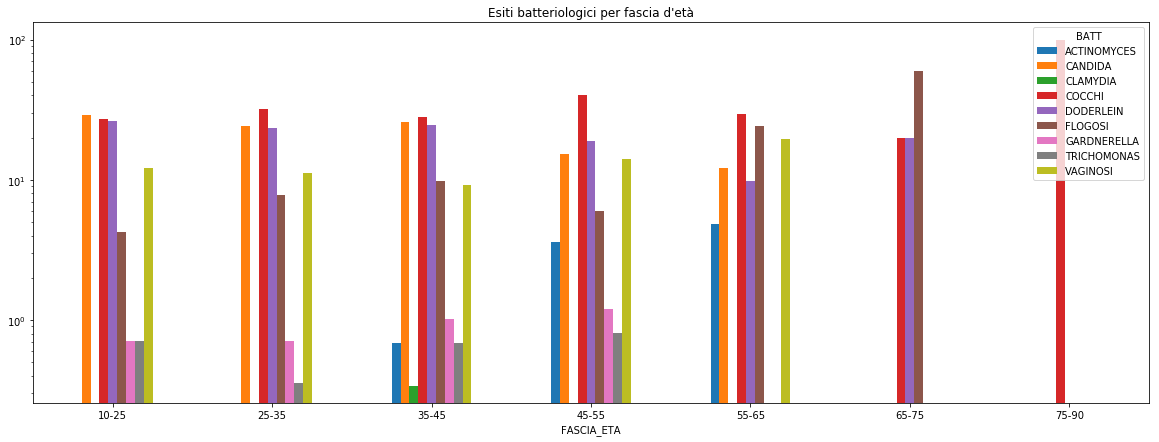

In [98]:
title_cross_eta_batt = 'Esiti batteriologici per fascia d\'età'

CROSS_ETA_BATT.plot(kind='bar', legend = True,\
                     title = title_cross_eta_batt,\
                     figsize=(20,7), rot=0, logy = True)
plt.savefig("plots/cross_eta_batt_barplot")

### CITO_PREC x CITO

In [99]:
CROSS_CPREC_CITO = pd.DataFrame(df[['CITO_PREC', 'CITO']])
CROSS_CPREC_CITO = CROSS_CPREC_CITO[['CITO_PREC','CITO']]
CROSS_CPREC_CITO.dropna(inplace=True)
CROSS_CPREC_CITO.head()

,CITO_PREC,CITO
3,NEGATIVO,AGC-NOS
4,NEGATIVO,NEGATIVO
8,NEGATIVO,NEGATIVO
11,NEGATIVO,NEGATIVO
20,LSIL,NEGATIVO


In [100]:
CROSS_CPREC_CITO = CROSS_CPREC_CITO.groupby(['CITO_PREC', 'CITO'])['CITO'].count()
CROSS_CPREC_CITO.rename('PCT', inplace=True)
CROSS_CPREC_CITO

CITO_PREC  CITO    
AGC-NOS    NEGATIVO       1
ASC-H      NEGATIVO       1
ASCUS      ASCUS          5
           LSIL           5
           NEGATIVO      26
HSIL       NEGATIVO      16
LSIL       ASCUS          6
           LSIL           5
           NEGATIVO      54
NEGATIVO   AGC-NOS        2
           AIS            1
           ASCUS         15
           HSIL           3
           LSIL          20
           NEGATIVO    1845
SCC        NEGATIVO       1
Name: PCT, dtype: int64

In [101]:
CROSS_CPREC_CITO = CROSS_CPREC_CITO.to_frame()
CROSS_CPREC_CITO.index = CROSS_CPREC_CITO.index.set_names(['CITO_PREC', 'CITO'])
CROSS_CPREC_CITO

PCT
CITO_PREC CITO          
AGC-NOS   NEGATIVO     1
ASC-H     NEGATIVO     1
ASCUS     ASCUS        5
          LSIL         5
          NEGATIVO    26
HSIL      NEGATIVO    16
LSIL      ASCUS        6
          LSIL         5
          NEGATIVO    54
NEGATIVO  AGC-NOS      2
          AIS          1
          ASCUS       15
          HSIL         3
          LSIL        20
          NEGATIVO  1845
SCC       NEGATIVO     1

In [102]:
CROSS_CPREC_CITO = CROSS_CPREC_CITO.groupby(level=[0]).apply(lambda x: x / x.sum() * 100)
CROSS_CPREC_CITO.reset_index(inplace=True)
CROSS_CPREC_CITO

,CITO_PREC,CITO,PCT
0,AGC-NOS,NEGATIVO,100.000000
1,ASC-H,NEGATIVO,100.000000
2,ASCUS,ASCUS,13.888889
3,ASCUS,LSIL,13.888889
4,ASCUS,NEGATIVO,72.222222
5,HSIL,NEGATIVO,100.000000
6,LSIL,ASCUS,9.230769
7,LSIL,LSIL,7.692308
8,LSIL,NEGATIVO,83.076923
9,NEGATIVO,AGC-NOS,0.106045


In [103]:
CROSS_CPREC_CITO = CROSS_CPREC_CITO.pivot(index='CITO_PREC', columns='CITO', values='PCT')

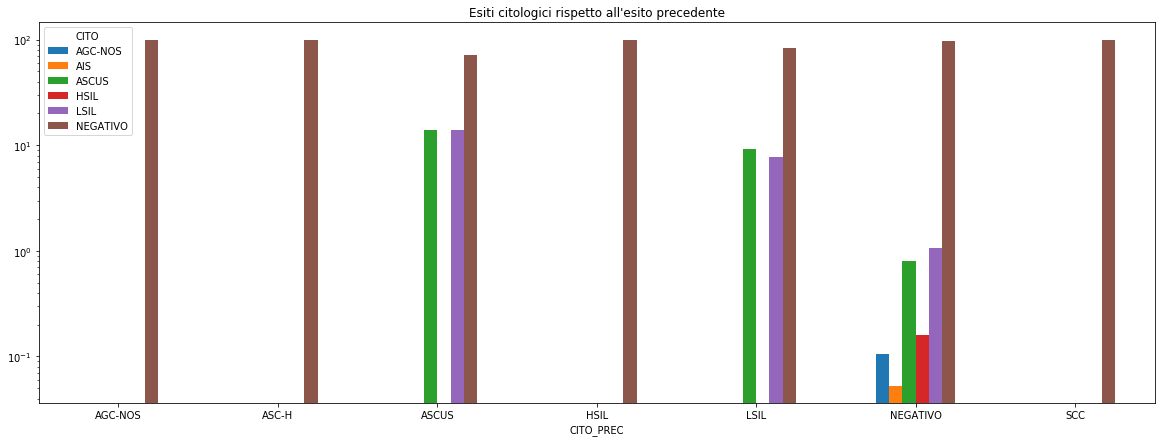

In [104]:
title_cross_cprec_cito = 'Esiti citologici rispetto all\'esito precedente'

CROSS_CPREC_CITO.plot(kind='bar', legend = True,\
                      title = title_cross_cprec_cito,\
                      figsize=(20,7), rot=0, logy = True)
plt.savefig("plots/cross_cito_prec_cito_barplot")